In [ ]:
from keras.datasets import boston_housing
(train_data, train_target),(test_data, test_target) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
train_target.shape

(404,)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
test_target.shape

(102,)

In [ ]:
### 모델링 
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))    # 회귀 1, activation 함수없음

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
history = model.fit(train_data, train_target, epochs=100, batch_size=1)

Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 113.9092 - mae: 8.1224
Epoch 2/100
404/404 [==============================] - 1s 1ms/step - loss: 96.8028 - mae: 7.4247
Epoch 3/100
404/404 [==============================] - 1s 1ms/step - loss: 71.2068 - mae: 6.2022
Epoch 4/100
404/404 [==============================] - 1s 1ms/step - loss: 65.3587 - mae: 5.9686
Epoch 5/100
404/404 [==============================] - 1s 1ms/step - loss: 61.9568 - mae: 5.8656
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 52.4115 - mae: 5.1725
Epoch 7/100
404/404 [==============================] - 1s 1ms/step - loss: 55.4609 - mae: 5.6185
Epoch 8/100
404/404 [==============================] - 1s 1ms/step - loss: 55.1483 - mae: 5.4368
Epoch 9/100
404/404 [==============================] - 1s 1ms/step - loss: 48.3596 - mae: 5.1684
Epoch 10/100
404/404 [==============================] - 1s 1ms/step - loss: 46.7378 - mae: 5.1443
Epoch 11/100
404/404 [======

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history   #딕셔너리 학습기록 
history.history.keys()

dict_keys(['loss', 'mae'])

In [ ]:
### 평가 
model.evaluate(test_data, test_target)

4/4 [==============================] - 0s 2ms/step - loss: 28.7630 - mae: 3.5516


[28.76302146911621, 3.551640748977661]

#### 성능개선


In [ ]:
### 스케일조정 
from sklearn.preprocessing import StandardScaler

s = StandardScaler() 
X_train = s.fit_transform(train_data)
X_test = s.transform(test_data)

In [ ]:
### 모델링 
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))    # 회귀 1, activation 함수없음

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
history = model.fit(X_train, train_target, epochs=200, batch_size=1, validation_split=0.2)

Epoch 1/200
323/323 [==============================] - 1s 2ms/step - loss: 150.8251 - mae: 9.0693 - val_loss: 28.1381 - val_mae: 4.0054
Epoch 2/200
323/323 [==============================] - 1s 2ms/step - loss: 22.7736 - mae: 3.2698 - val_loss: 19.6531 - val_mae: 3.4915
Epoch 3/200
323/323 [==============================] - 1s 2ms/step - loss: 17.0704 - mae: 2.8258 - val_loss: 17.7005 - val_mae: 3.1763
Epoch 4/200
323/323 [==============================] - 1s 2ms/step - loss: 14.7246 - mae: 2.6007 - val_loss: 15.6853 - val_mae: 2.8682
Epoch 5/200
323/323 [==============================] - 1s 2ms/step - loss: 12.8627 - mae: 2.5534 - val_loss: 15.2014 - val_mae: 3.0682
Epoch 6/200
323/323 [==============================] - 1s 2ms/step - loss: 11.1862 - mae: 2.3655 - val_loss: 16.7645 - val_mae: 3.1960
Epoch 7/200
323/323 [==============================] - 1s 2ms/step - loss: 11.7781 - mae: 2.3806 - val_loss: 14.2487 - val_mae: 2.9619
Epoch 8/200
323/323 [==============================] -

### 시각화

In [ ]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
loss = history.history['loss']
mae = history.history['mae']
val_loss = history.history['val_loss']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)   # x축으로 사용될 값

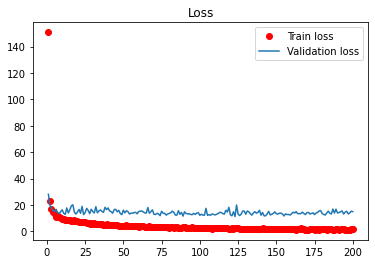

In [ ]:
plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend() 
plt.title('Loss')
plt.show()

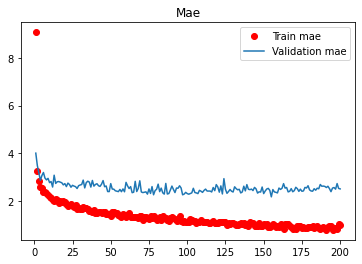

In [ ]:
plt.plot(epochs, mae, 'ro', label='Train mae')
plt.plot(epochs, val_mae, label='Validation mae')
plt.legend() 
plt.title('Mae')
plt.show()